In [1]:
require './moromoro'

true

In [2]:
a_df = <<DATA.to_df
m[kg], x[cm], N , y[cm], time[s]
0.35,  5,     30, 30.1 , 34.31
0.35,  5,     30, 35.1 , 36.37
0.35,  5,     30, 40.1 , 38.30
0.35,  5,     30, 45.1 , 40.14
0.35,  5,     30, 50.1 , 42.05
0.35,  5,     30, 55.1 , 43.85
0.35,  5,     30, 60.1 , 45.89
DATA

m[kg],x[cm],N,y[cm],time[s]
0.35,5.0,30.0,30.1,34.31
0.35,5.0,30.0,35.1,36.37
0.35,5.0,30.0,40.1,38.3
0.35,5.0,30.0,45.1,40.14
0.35,5.0,30.0,50.1,42.05
0.35,5.0,30.0,55.1,43.85
0.35,5.0,30.0,60.1,45.89


In [3]:
a_df.map { |row| { 'y[cm]' => row['y[cm]'], 'time[s]' => row['time[s]'] } }.reset.save_csv('csv/A.csv')

"csv/A.csv"

In [4]:
def f_model(y)
  g = 9.797 # m/s^2
  1.to_f/ (2*Math::PI) * Math.sqrt(g/y)
end

:f_model

In [70]:
a_with_calc_df = a_df.map do |row|
  t = row['time[s]'].to_f / row['N'].to_f
  f = 1/t
  y = row['y[cm]'] / 100.to_f
  x = row['x[cm]'] / 100.to_f
  f_absolute_error = (f_model(y) - f).abs
  row.merge(
    'y[m]' => y,
    'x[m]' => x,
    'T[s]' => t,
    'f[Hz]' => f,
    'f_model[Hz]' => f_model(y),
    'f_model_possible_error[Hz]' => 30.0/row['time[s]']**2 * 0.2,
    'f_absolute_error[Hz]' => f_absolute_error,
    'f_relative_error[%]' => f_absolute_error / f_model(y) * 100
  )
end.reset

m[kg],x[cm],N,y[cm],time[s],y[m],x[m],T[s],f[Hz],f_model[Hz],f_model_possible_error[Hz],f_absolute_error[Hz],f_relative_error[%]
0.35,5.0,30.0,30.1,34.31,0.301,0.05,1.1436666666666668,0.8743806470416787,0.9079949599505865,0.005096943439473499,0.03361431290890782,3.702037389143341
0.35,5.0,30.0,35.1,36.37,0.35100000000000003,0.05,1.2123333333333333,0.8248556502612043,0.8408395428705104,0.004535912291785562,0.015983892609306105,1.9009444482997666
0.35,5.0,30.0,40.1,38.3,0.401,0.05,1.2766666666666666,0.783289817232376,0.7866734613250321,0.004090286251866194,0.003383644092656124,0.4301205339960101
0.35,5.0,30.0,45.1,40.14,0.451,0.05,1.338,0.7473841554559043,0.7417856280893437,0.003723887172176902,0.005598527366560635,0.7547365646569693
0.35,5.0,30.0,50.1,42.05,0.501,0.05,1.4016666666666666,0.713436385255648,0.7037976667768022,0.003393276505377637,0.009638718478845787,1.3695297574640224
0.35,5.0,30.0,55.1,43.85,0.551,0.05,1.4616666666666667,0.6841505131128849,0.6711056362600124,0.0031204128306174905,0.013044876852872478,1.943788898208327
0.35,5.0,30.0,60.1,45.89,0.601,0.05,1.5296666666666667,0.653737197646546,0.6425833223660736,0.0028491488239117285,0.011153875280472403,1.7357866119840168


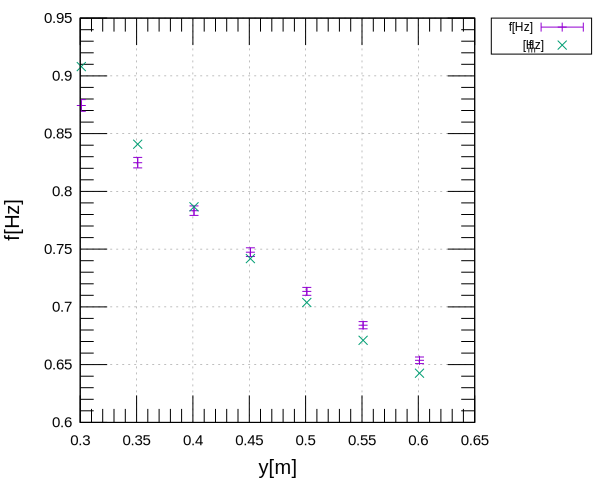

In [71]:
a_with_calc_df.plot(
  targets: [{ x: 'y[m]', y: 'f[Hz]', yerror: 'f_model_possible_error[Hz]', with: :yerrorbars }, { x: 'y[m]', y: 'f_model[Hz]', title: 'f_{m}[Hz]' }],
  options: {},
  file: 'graph/a_with_model.png'
)

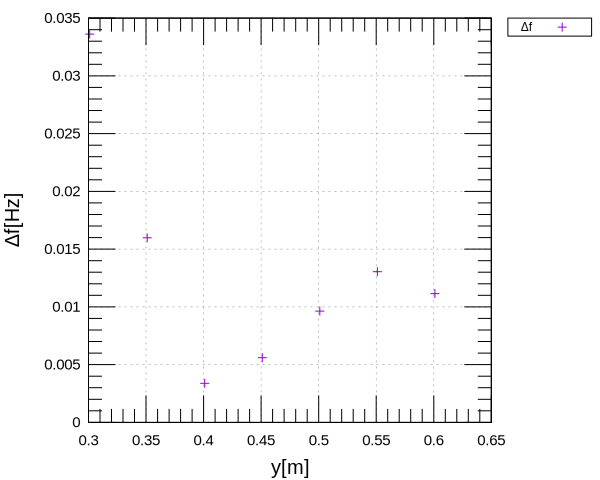

In [72]:
a_with_calc_df.plot(
  targets: [{ x: 'y[m]', y: 'f_absolute_error[Hz]', title: 'Δf'}],
  options: {
    yl: 'Δf[Hz]'
  },
  file: 'graph/a_abs_error.png'
)

In [53]:
a_with_f_square = a_with_calc_df.map { |row| row.merge(
  'f2' => row['f[Hz]']**2, 'y2' => row['y[m]']**2
) }.reset
nil

In [59]:
a_slope = a_with_f_square.slope(x: 'y[m]', y: 'f2')
a_segment = a_with_f_square.segment(x: 'y[m]', y: 'f2')
a_with_f_square_and_regression = a_with_f_square.map do |row|
  row.merge(
    'regression' => a_slope * row['y[m]'] + a_segment
  )
end.reset

m[kg],x[cm],N,y[cm],time[s],y[m],x[m],T[s],f[Hz],f_model[Hz],f_model_possible_error[Hz],f_absolute_error[Hz],f_relative_error[%],f2,y2,regression
0.35,5.0,30.0,30.1,34.31,0.301,0.05,1.1436666666666668,0.8743806470416787,0.9079949599505865,0.005096943439473499,0.03361431290890782,3.702037389143341,0.7645415159210247,0.09060099999999999,0.7395731078966038
0.35,5.0,30.0,35.1,36.37,0.35100000000000003,0.05,1.2123333333333333,0.8248556502612043,0.8408395428705104,0.004535912291785562,0.015983892609306105,1.9009444482997666,0.6803868437678342,0.12320100000000002,0.6845477908492287
0.35,5.0,30.0,40.1,38.3,0.401,0.05,1.2766666666666666,0.783289817232376,0.7866734613250321,0.004090286251866194,0.003383644092656124,0.4301205339960101,0.613542937779929,0.16080100000000003,0.6295224738018537
0.35,5.0,30.0,45.1,40.14,0.451,0.05,1.338,0.7473841554559043,0.7417856280893437,0.003723887172176902,0.005598527366560635,0.7547365646569693,0.5585830758265353,0.203401,0.5744971567544787
0.35,5.0,30.0,50.1,42.05,0.501,0.05,1.4016666666666666,0.713436385255648,0.7037976667768022,0.003393276505377637,0.009638718478845787,1.3695297574640224,0.5089914758066454,0.251001,0.5194718397071036
0.35,5.0,30.0,55.1,43.85,0.551,0.05,1.4616666666666667,0.6841505131128849,0.6711056362600124,0.0031204128306174905,0.013044876852872478,1.943788898208327,0.4680619245926237,0.30360100000000007,0.4644465226597285
0.35,5.0,30.0,60.1,45.89,0.601,0.05,1.5296666666666667,0.653737197646546,0.6425833223660736,0.0028491488239117285,0.011153875280472403,1.7357866119840168,0.4273723235867592,0.361201,0.4094212056123536


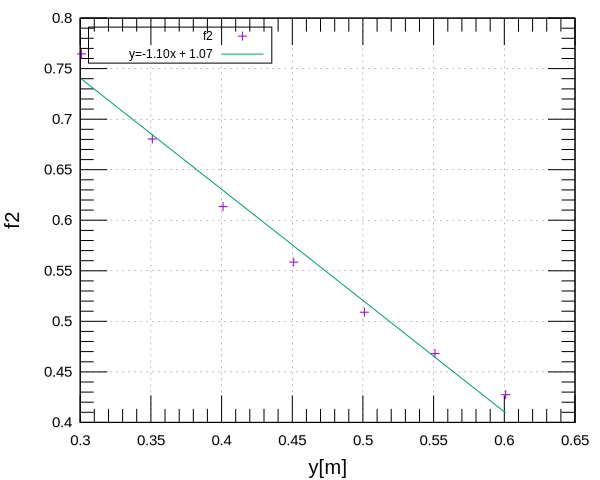

In [61]:
a_with_f_square_and_regression.plot(
  targets: [
    { x: 'y[m]', y: 'f2' },
    { x: 'y[m]', y: 'regression', with: :line, title: "y=#{'%.2f' % a_slope}x + #{'%.2f' % a_segment}" }
  ],
  options: {
    key: 'box inside left top',
  },
  file: 'graph/a_f_square_with_regression.png'
)

In [9]:
a_with_f_square.slope(x: 'y[m]', y: 'f2')

-1.1005063409475007

In [10]:
a_with_f_square.slope_error(x: 'y[m]', y: 'f2')

0.031179929766032857

In [12]:
b_df = <<DATA.to_df
s_a_dash[mm], s_b_dash[mm]
-10, -0.8
-20, -2.0
-30, -2.9
-40, -4.0
-50, -4.9
-60, -5.5
-70, -6.8
-80, -8.0
-90, -8.9
10, 1.0
20, 2.1
25, 2.9
30, 3.5
35, 3.8
40, 4.1
45, 4.7
50, 5.0
55, 5.8
60, 6.3
65, 7.0
70, 7.5
75, 7.8
80, 8.0
85, 9.0
90, 9.4
DATA
nil

In [13]:
def s_to_theta(s)
  r = 63.5 * 10 **(-2)
  s / r
end

:s_to_theta

In [46]:
s_a_0 = 3.5 * 10**(-3)
s_b_0 = 1.0 * 10**(-3)

b_with_calc_df = b_df.map do |row|
  s_a = (row['s_a_dash[mm]'] * 10**(-3) - s_a_0)
  s_b = (row['s_b_dash[mm]'] * 10**(-3) - s_b_0)
  theta_a = s_to_theta(s_a)
  theta_b = s_to_theta(s_b)
  row.merge(
    's_a[mm]' => s_a,
    's_b[mm]' => s_b,
    'theta_a' => theta_a,
    'theta_b' => theta_b,
    'sin_theta_b' => Math.sin(theta_b),
    'delta_theta' => theta_a - theta_b
  )
end.to_a.to_df

s_a_dash[mm],s_b_dash[mm],s_a[mm],s_b[mm],theta_a,theta_b,sin_theta_b,delta_theta
-10.0,-0.8,-0.0135,-0.0018,-0.02125984251968504,-0.0028346456692913383,-0.0028346418731277907,-0.0184251968503937
-20.0,-2.0,-0.0235,-0.003,-0.03700787401574803,-0.004724409448818898,-0.004724391874000212,-0.03228346456692913
-30.0,-2.9,-0.0335,-0.0039,-0.05275590551181102,-0.0061417322834645665,-0.006141693671617647,-0.046614173228346455
-40.0,-4.0,-0.043500000000000004,-0.005,-0.06850393700787402,-0.007874015748031496,-0.0078739343832916,-0.060629921259842526
-50.0,-4.9,-0.053500000000000006,-0.005900000000000001,-0.08425196850393701,-0.009291338582677167,-0.009291204897968468,-0.07496062992125985
-60.0,-5.5,-0.0635,-0.0065,-0.1,-0.010236220472440945,-0.01023604171448976,-0.08976377952755907
-70.0,-6.8,-0.07350000000000001,-0.0078,-0.11574803149606301,-0.012283464566929133,-0.012283155673901537,-0.10346456692913387
-80.0,-8.0,-0.0835,-0.009000000000000001,-0.131496062992126,-0.014173228346456694,-0.014172753830588686,-0.1173228346456693
-90.0,-8.9,-0.0935,-0.009899999999999999,-0.14724409448818898,-0.01559055118110236,-0.015589919601814198,-0.13165354330708662
10.0,1.0,0.006500000000000001,0.0,0.010236220472440946,0.0,0.0,0.010236220472440946


In [39]:
b_with_calc_df.slice('s_a[mm]', 's_b[mm]').map { |row| { 's_A[mm]' => '%.1e' % row['s_a[mm]'], 's_B[mm]' => '%.1e' % row['s_b[mm]'] } }.reset.save_csv('csv/B.csv')

"csv/B.csv"

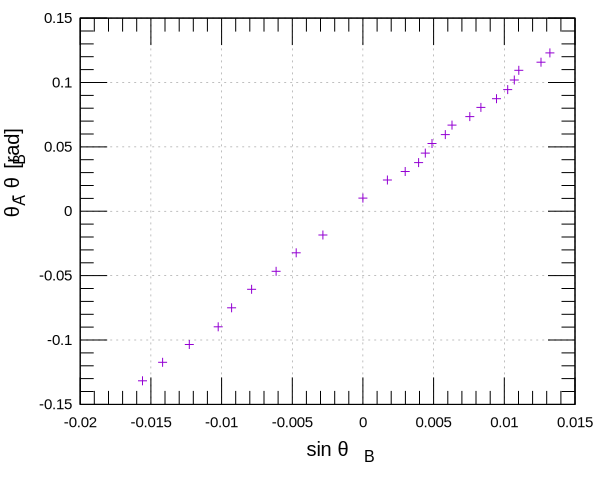

In [45]:
b_with_calc_df.plot(
  targets: [{ x: 'sin_theta_b', y: 'delta_theta', title: '' }],
  options: {
    nokey: '',
    yl: 'θ_A - θ_B[rad]',
    xl: 'sin θ_B'
  },
  file: 'graph/b.png'
)

In [17]:
b_slope = b_with_calc_df.slope(x: 'sin_theta_b', y: 'delta_theta')

8.854226559826333

In [18]:
b_slope_error = b_with_calc_df.slope_error(x: 'sin_theta_b', y: 'delta_theta')

0.000547080795105795

In [19]:
b_segment = b_with_calc_df.segment(x: 'sin_theta_b', y: 'delta_theta')

0.00688400981627587

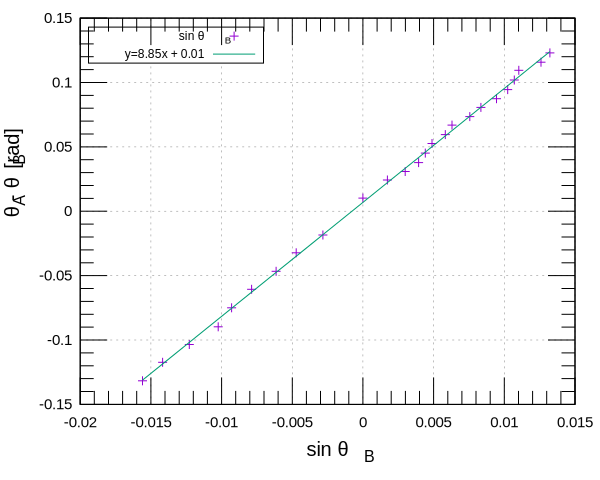

In [49]:
b_with_calc_df.map do |row|
  row.merge(
    'linear_regression' => row['sin_theta_b'] * (b_slope + b_slope_error) + b_segment,
  )
end.to_a.to_df.plot(
  targets: [
    { x: 'sin_theta_b', y: 'delta_theta', title: 'sin θ_B' },
    { x: 'sin_theta_b', y: 'linear_regression', with: :line, title: "y=#{'%.2f' % b_slope}x + #{'%.2f' % b_segment}" }],
  options: {
    key: 'box inside left top',
    yl: 'θ_A - θ_B[rad]',
    xl: 'sin θ_B'
  },
  file: 'graph/b_with_regression.png'
)

In [21]:
omega_1 = 1/((39.17 + 39.19)/2/30) * 2 * Math::PI

4.8110147834453185

In [22]:
omega_2 = 1/((35.56 + 35.54)/2/30) * 2 * Math::PI

5.3022660820080905

In [23]:
t_ab_model = (2*Math::PI)/(omega_2 - omega_1)

12.790165289256173

In [24]:
t_ab = ((11.90 + 12.05 + 12.27 + 11.83 + 12.21)/5)

12.052

In [25]:
(((t_ab - t_ab_model).abs / t_ab_model)*100).round

6

In [26]:
dTab_domega1 = 2 * Math::PI / (omega_2 - omega_1)**2

26.035891053470365

In [27]:
dTab_domega2 = - 2 * Math::PI / (omega_2 - omega_1)**2

-26.035891053470365

In [28]:
domega1 = -60*Math::PI/(39.18)**2 * 0.2

-0.02455852365209453

In [29]:
domega2 = -60*Math::PI/(35.55)**2 * 0.2

-0.02982990763436338

In [30]:
Math.sqrt(dTab_domega1**2 * domega1**2+ dTab_domega2**2 * domega2**2).round(1)

1.0

In [31]:
q = b_slope.round(2)

8.85

In [73]:
omega_0 = 2 * Math::PI * 0.7474 # 実験Aでy=0.45[m]のときのfの値より

4.696052698586023

In [74]:
t_ab_by_q = 2*Math::PI/(omega_0*(Math.sqrt(1 + 2/q) - 1))

12.475988160409615

In [34]:
1/(0.08)

12.5

In [75]:
5/63.5

0.07874015748031496

In [79]:
f_1 = 1/((39.17 + 39.19)/2 / 30)

0.7656967840735068

In [78]:
f_2 = 1/((35.56 + 35.54)/2 / 30)

0.8438818565400845

In [108]:
(f_2 - f_1)

0.07818507246657769

In [84]:
f_AB = 1/([11.90, 12.05, 12.27, 11.83, 12.21].inject(:+)/5)

0.0829737802854298

In [117]:
def calc_theta_a(t, f)
  0.0787 * Math.cos(2 * Math::PI * f * t)
end

def calc_theta_b(t, f)
  0.0787 * Math.sin(2 * Math::PI * f * t)
end

ts = [*0..1600].map { |i| i.to_f / 100 }
t_to_theta = ts.map do |t|
  {
    t: t,
    theta_a_by_f1_f2: calc_theta_a(t, (f_2 - f_1)),
    theta_b_by_f1_f2: calc_theta_b(t, (f_2 - f_1)),
    theta_a_by_f_ab: calc_theta_a(t, f_AB),
    theta_b_by_f_ab: calc_theta_b(t, f_AB),
  }
end.to_df
nil

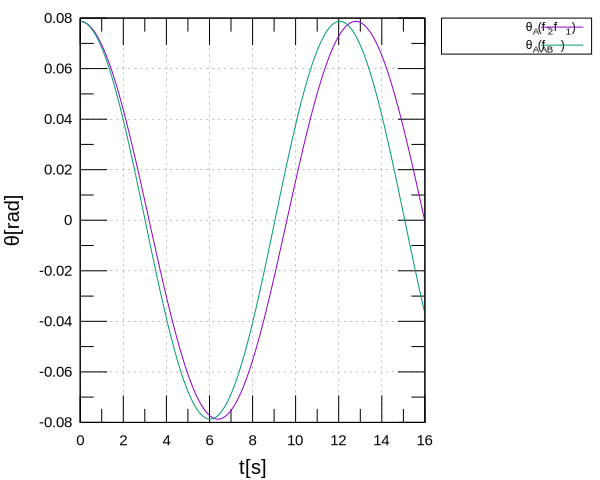

In [118]:
t_to_theta.plot(
  targets: [
    { x: :t, y: :theta_a_by_f1_f2, title: 'θ_A(f_2 - f_1)', with: :line },
    { x: :t, y: :theta_a_by_f_ab, title: 'θ_A(f_{AB})', with: :line },
  ],
  options: {
    yl: 'θ[rad]',
    xl: 't[s]'
  },
  file: 'graph/t_to_theta_A.png'
)

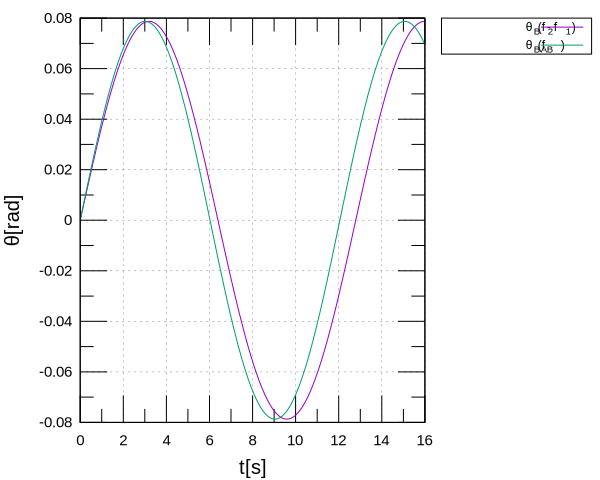

In [119]:
t_to_theta.plot(
  targets: [
    { x: :t, y: :theta_b_by_f1_f2, title: 'θ_B(f_2 - f_1)', with: :line },
    { x: :t, y: :theta_b_by_f_ab, title: 'θ_B(f_{AB})', with: :line },
  ],
  options: {
    yl: 'θ[rad]',
    xl: 't[s]'
  },
  file: 'graph/t_to_theta_B.png'
)